# Predict

--------------------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import collections

from os import listdir
import os
from os.path import isfile, join
import numpy as np
import cv2
import scipy as misc

import matplotlib.pylab as plt
%matplotlib inline

from __future__ import division
from __future__ import print_function

import argparse
import sys

import glob
import time

import tensorflow as tf

# KERAS IMPORTS
import keras
from keras import applications
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import History 
from keras.models import model_from_json

#SKLEARN
from sklearn.metrics import classification_report

C:\Users\TempUser\Anaconda3\envs\CPU_tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Rebuild VGG16

In [2]:
conv_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(200, 200,3))

### Load model from file

In [3]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [4]:
labels =['door',
'chair',
'bookshelf',
'bathtub',
'bench',
'table',
'bed',
'sofa',
'vase',
'plant',
'lamp',
'sink',
'stair',
'toilet']

### Load test image and Predict

    Plot function

In [14]:
def plot_predict(predictions, actual_class):
    fig = plt.figure(figsize=(15, 8))
    fig.patch.set_facecolor('white')

    ax1 = fig.add_subplot(2, 2, 1)
    plt.imshow(test_img)
    plt.title('3D Model image')

    #Plot Day Count
    fig.add_subplot(2, 2, 2)
    barlist = plt.bar(np.arange(len(predictions[0])),predictions[0])
    if(labels[np.argmax(predictions[0])] != actual_class):
        barlist[np.argmax(predictions[0])].set_color('r')
    elif(labels[np.argmax(predictions[0])] == actual_class):
        barlist[np.argmax(predictions[0])].set_color('g')
    plt.ylabel('Prediction Confidence (in percent)')
    plt.xlabel('Classes')
    plt.xticks(range(len(labels)), labels, rotation=70)
    plt.grid(linestyle='dotted', linewidth=.8)
    plt.yticks(np.linspace(0, 1.0, num=11), fontsize=10)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    #plt.grid(True)
    #plt.title(Days[index] + " @ " +Stores[store_id]['name'])
    plt.tight_layout()

#### Make prediction

chair
Prediction Confidence : 99.98162388801575%


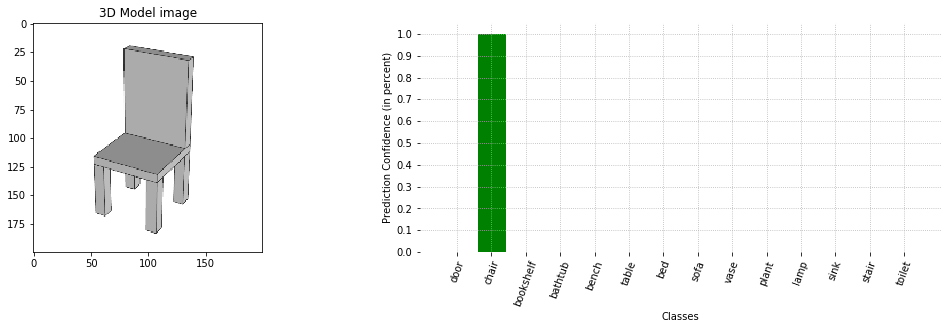

In [15]:
img_size = 200

IMG = cv2.imread('test_img/v2.jpg')
test_img = cv2.resize(IMG, (img_size, img_size), 3)
test_img = test_img.astype(np.float32)/255

predictions = model.predict(np.reshape(conv_base.predict(test_img.reshape([1,img_size,img_size,3])), (1, 6 * 6 * 512)))

plot_predict(predictions, 'chair')


print(labels[np.argmax(predictions[0])])
print("Prediction Confidence : "+ str(np.max(predictions[0])*100)+ "%")

#### CHAIR

In [16]:
imgs = ['v0.jpg','v1.jpg','v2.jpg','v3.jpg','v4.jpg']

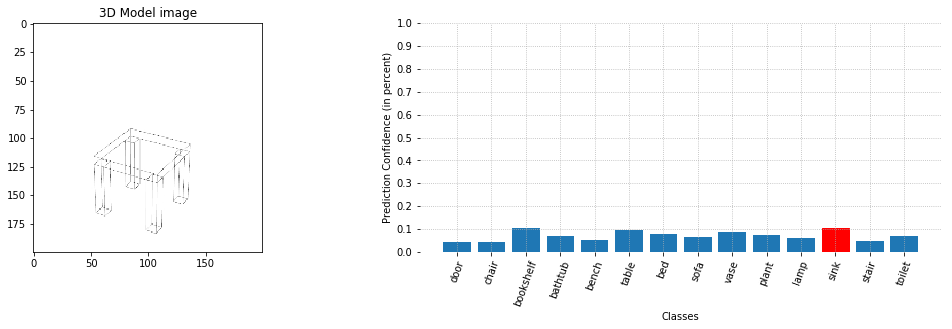

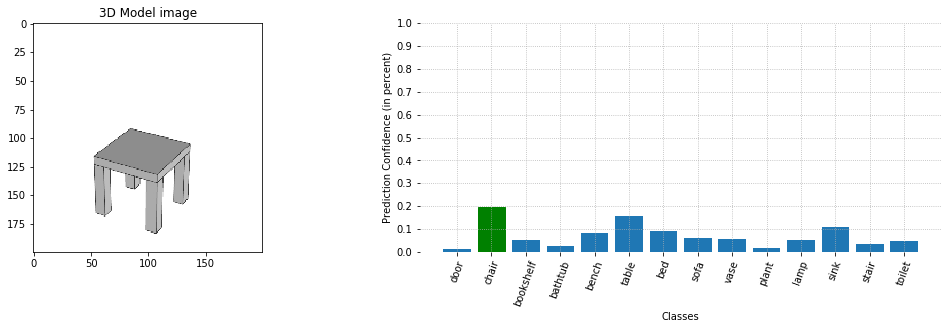

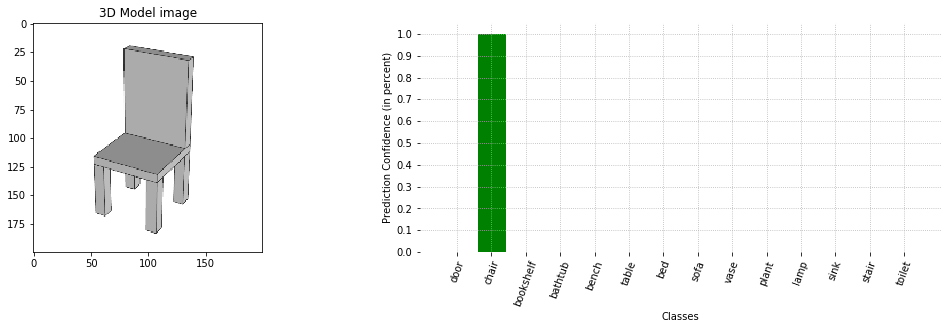

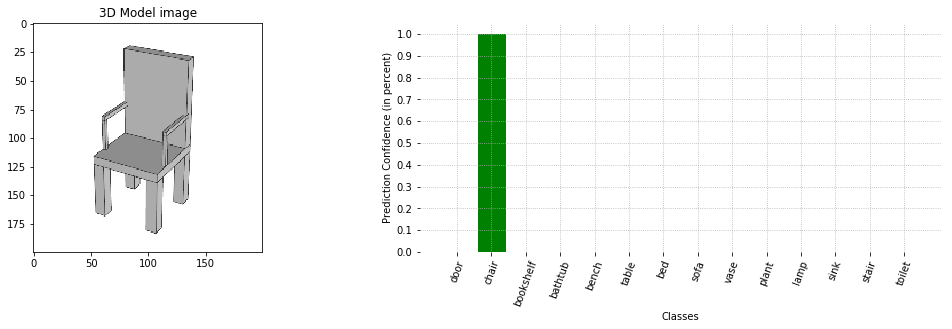

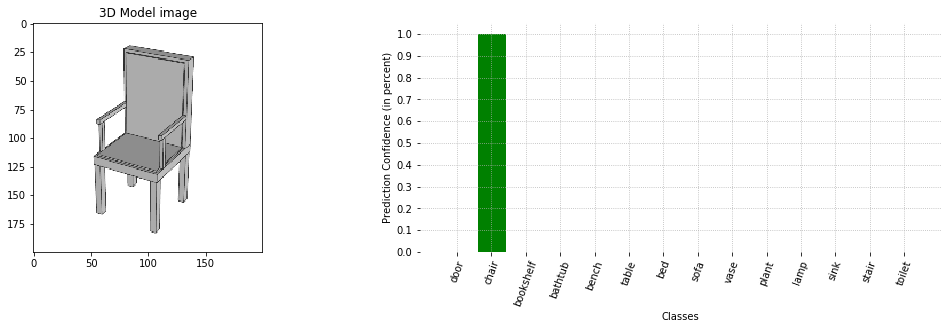

In [21]:
for img in imgs:
    IMG = cv2.imread('test_img/_chair/'+img)
    test_img = cv2.resize(IMG, (img_size, img_size), 3)
    test_img = test_img.astype(np.float32)/255
    predicted_value = model.predict(np.reshape(conv_base.predict(test_img.reshape([1,img_size,img_size,3])), (1, 6 * 6 * 512)))
    plot_predict(predicted_value, 'chair')

#### BOOKSHELF

In [23]:
imgs_bookshelf = ['v0.jpg','v1.jpg','v2.jpg','v3.jpg','v4.jpg']

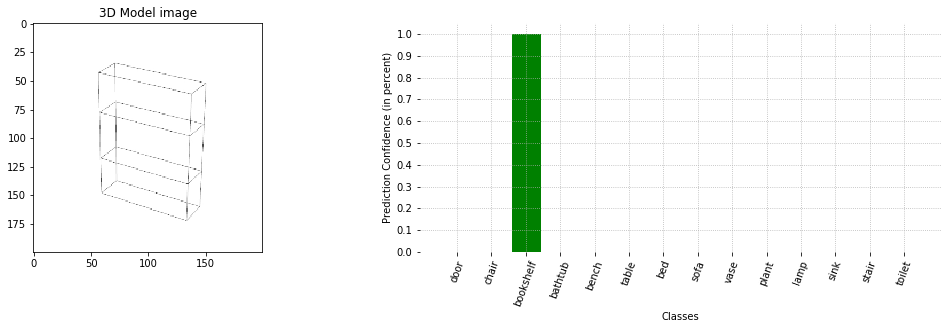

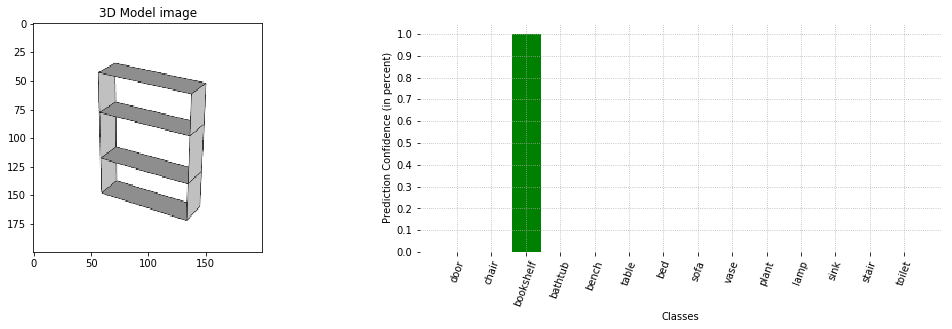

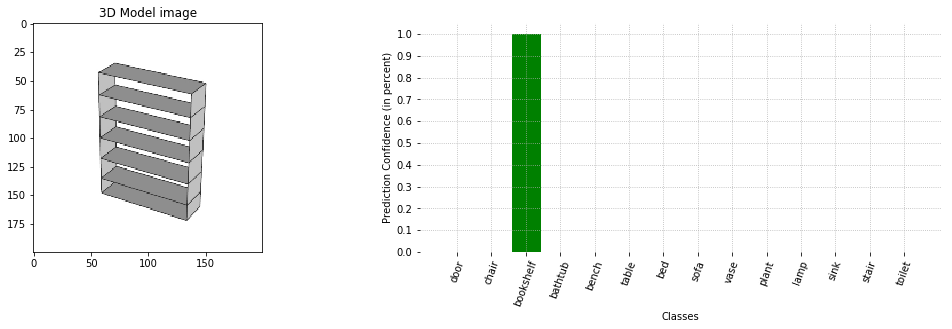

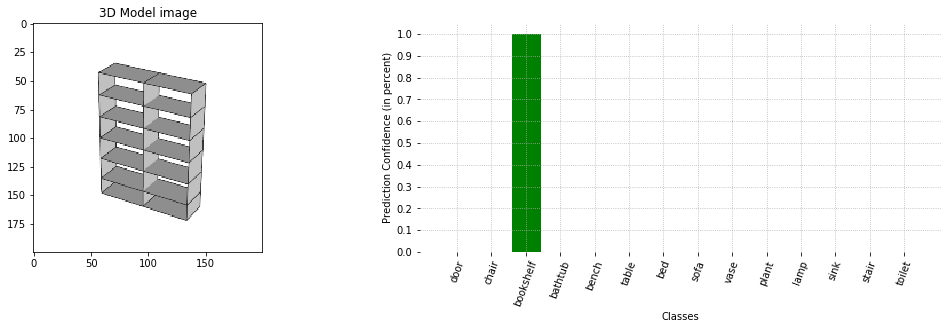

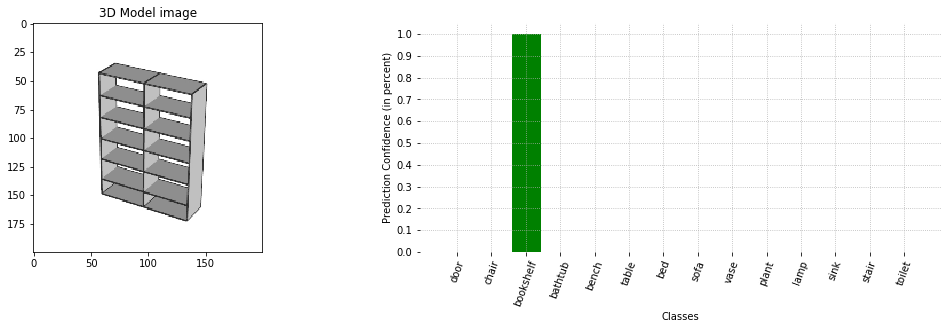

In [26]:
for img in imgs_bookshelf:
    IMG = cv2.imread('test_img/_bookshelf/'+img)
    test_img = cv2.resize(IMG, (img_size, img_size), 3)
    test_img = test_img.astype(np.float32)/255
    predicted_value = model.predict(np.reshape(conv_base.predict(test_img.reshape([1,img_size,img_size,3])), (1, 6 * 6 * 512)))
    plot_predict(predicted_value, 'bookshelf')